> 提示：项目 Notebook 模板主要为了帮助同学了解如何划分报告结构，提示项目的注意事项。如果你理解项目的所有要求，那么完全可以自己创建新的 Notebook 来完成报告。

> 提交项目时，建议删除所有提示性文字，只保留你自己的 Markdown 说明文字和代码注释。

# twitter 上关于狗的数据分析
## 收集

In [1]:
import numpy as np
import pandas as pd
import requests
import json

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
URL = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'    
with open(URL.split('/')[-1],mode='wb') as file:
    image = requests.get(URL)
    file.write(image.content)
    
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

In [4]:
with open('tweet_json.txt','r')as file:

    tweet_contents = []
    for l in file:
        l_contents = json.loads(l)
        l_dict = {'tweet_id':l_contents['id'],'retweet_count':l_contents['retweet_count'],'favorite_count':l_contents['favorite_count']}
        tweet_contents.append(l_dict)
     
from_tweet = pd.DataFrame( tweet_contents, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## 评估
### 目测评估

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
from_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


> twitter_archive：
- 大量的列标签下数据为Nan；
- 时间戳的格式有问题；
- name中很多名字输入错误；
- 宠物的阶段的展现形式不好；
- 资料来源里有一些网页抓取的标签。

> image_predictions
- 未发现明显问题。

> from_tweet
- 未发现明显问题。

### 编程评估

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Buddy         7
an            7
Toby          7
Daisy         7
Dave          6
Milo          6
Rusty         6
Oscar         6
Leo           6
Bella         6
Koda          6
Jax           6
Stanley       6
Scout         6
Jack          6
Oakley        5
           ... 
Trevith       1
Rover         1
Bradley       1
Todo          1
Trigger       1
Ole           1
Tilly         1
Winifred      1
Walker        1
Yoda          1
Brockly       1
Oreo          1
Jim           1
Ember         1
Lance         1
Chuck         1
Bertson       1
Burt          1
Lizzie        1
Fwed          1
Anthony       1
Sandra        1
Cilantro      1
Cal           1
Bruiser       1
Brandy        1
Flash         1
Flurpson      1
Kloey         1
Carter        1
Name: name, Length: 957,

In [12]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                       

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
from_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### 质量
#####  twitter_archive 表格
- 首列项目中有很多项目没有数值，应该删除；
- 狗的名字存在填写错误，可以删除或者替换；
- 评分存在数据不标准，需要统一标准；
- 时间数据的类型不利于统计分析，应替换成时间类型；
- expanded_urls存在数据缺失，可以删除行或者填充其他信息替换；
- 来源列的信息有冗余内容，应该只保留网页链接。

$\color{blue}{- 转发内容属于重复数据，应该删除}$

##### image_predictions 表格
- 图片存在因为转发产生的重复问题，应该将重复的内容删除；
- 数据数量与其他两张表不同，应该有部分遗失。

$\color{blue}{- 有的账号不含有图片，应予以过滤}$

##### from_tweet 表格
- 未发现问题。

#### 整洁度
- 狗的成长阶段展示不科学，应在状态列下统一填列；
- 三张表有共同的ID信息，应该整合成一张表方便统计分析；
- 狗的评价可以放在一列，以百分比的形式呈现。


## 清理

In [15]:
df_twitter_archive = twitter_archive.copy()
df_image_predictions = image_predictions.copy()
df_from_tweet = from_tweet.copy()

#### 问题描述一

##### 定义
用drop（）方法，删除twitter_archive表中的缺少信息的列。

##### 代码

In [16]:
df_twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

##### 测试

In [17]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 276.2+ KB


#### 问题描述二

##### 定义
用replace（）方法将twitter_archive表中name列中的a、an、the以及None等替换成nan。

##### 代码

In [18]:
df_twitter_archive['name'] = df_twitter_archive.name.replace(['a','an','the','such','quite','not','very','just','my','one','his','None'],np.nan)

##### 测试

In [19]:
list(df_twitter_archive.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 nan,
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 nan,
 'Waffles',
 nan,
 'Jimbo',
 'Maisey',
 nan,
 'Lilly',
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 nan,
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 nan,
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 nan,
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 nan,
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 nan,
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 nan,
 'Cash',
 'Coco',
 'Jed',
 nan,
 'Sebastian',
 'Walter',
 nan,
 'Sierra',
 'Sierra',
 nan,
 nan,
 nan,
 'Monkey',
 nan,
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'D

#### 问题描述三

##### 定义
根据twitter_archive表中文本内容中的信息修订评分数值，很多是多只狗的信息，需要除数量。

##### 代码

In [20]:
pd.set_option('expand_frame_repr',True)
pd.set_option('display.max_colwidth', 1000)
df_twitter_archive.loc[df_twitter_archive.rating_denominator!=10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [21]:
extract_rate = df_twitter_archive.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)')
df_twitter_archive['rating_numerator'] = extract_rate[0].astype(float)
df_twitter_archive['rating_denominator'] = extract_rate[1].astype(float)
df_twitter_archive.loc[df_twitter_archive.rating_denominator!=10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,NaN,NaN
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


In [22]:
df_twitter_archive['rating_numerator']  = df_twitter_archive['rating_numerator'] / df_twitter_archive['rating_denominator'] *10
df_twitter_archive['rating_denominator'] = 10

In [23]:
df_twitter_archive.rating_numerator.value_counts()

12.00      562
11.00      469
10.00      464
13.00      352
9.00       158
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        15
2.00        11
1.00         8
0.00         2
420.00       2
15.00        2
9.75         2
17.00        1
1776.00      1
13.50        1
11.27        1
666.00       1
9.50         1
11.26        1
182.00       1
Name: rating_numerator, dtype: int64

In [24]:
df_twitter_archive.rating_numerator.replace([420.00,1776.00,666.00,182.00],[4.20,17.76,6.66,1.82],inplace=True)

##### 测试

In [25]:
df_twitter_archive.rating_numerator.value_counts()

12.00    562
11.00    469
10.00    464
13.00    352
9.00     158
8.00     102
14.00     56
7.00      54
5.00      35
6.00      32
3.00      19
4.00      15
2.00      11
1.00       8
0.00       2
4.20       2
9.75       2
15.00      2
13.50      1
17.00      1
6.66       1
1.82       1
9.50       1
11.27      1
11.26      1
17.76      1
Name: rating_numerator, dtype: int64

#### 问题描述四

##### 定义
用datetime将twitter_archive表中的时间戳替换成时间格式。

##### 代码

In [26]:
df_twitter_archive['timestamp']  = pd.to_datetime(df_twitter_archive['timestamp'])

##### 测试

In [27]:
df_twitter_archive['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

#### 问题描述五

##### 定义
twitter_archive表中的扩展链接有一些确实，链接的组成部分是固定网址加ID，用for循环将确实链接不上。

##### 代码

In [28]:
df_twitter_archive.loc[df_twitter_archive.expanded_urls.isnull(),['tweet_id','source']]

,tweet_id,source
30,886267009285017600,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
55,881633300179243008,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
64,879674319642796034,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
113,870726314365509632,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
148,863427515083354112,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
179,857214891891077121,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
185,856330835276025856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
186,856288084350160898,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
188,855862651834028034,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
189,855860136149123072,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [29]:
for i in  df_twitter_archive['expanded_urls']:
    if i == "":
        i == 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
    else:
        i == ['expanded_urls']
df_twitter_archive['expanded_urls'] = i

##### 测试

In [30]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2353 non-null float64
rating_denominator            2356 non-null int64
name                          1519 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 276.2+ KB


#### 问题描述      审阅增加

##### 定义
用drop方式删除retweet列中不是nan的行。

##### 代码 

In [31]:
df_twitter_archive.drop(df_twitter_archive[df_twitter_archive.retweeted_status_id.notnull()].index, inplace = True)

##### 测试

In [32]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2172 non-null float64
rating_denominator            2175 non-null int64
name                          1407 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 271.9+ KB


#### 问题描述六

##### 定义
twitter_archive表中来源信息通过正则表达式提取其中主要内容。

##### 代码

In [33]:
df_twitter_archive.source = df_twitter_archive.source.str.extract('>(.+)<')

##### 测试

In [34]:
df_twitter_archive.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 问题描述七

##### 定义
image_predictions表中存在因转发产生的重复信息，用drop_duplicates（）方法删除。

##### 代码

In [35]:
df_image_predictions.drop_duplicates('jpg_url',inplace = True)

##### 测试

In [36]:
df_image_predictions.duplicated('jpg_url').sum()

0

In [37]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### 问题描述八

##### 定义
twitter_archive表中狗的成长阶段应该合并成一行。

##### 代码

In [38]:
df_twitter_archive['doggo']=df_twitter_archive.doggo.replace("None","", regex=True)
df_twitter_archive['floofer']=df_twitter_archive.floofer.replace("None","", regex=True)
df_twitter_archive['pupper']=df_twitter_archive.pupper.replace("None","", regex=True)
df_twitter_archive['puppo']=df_twitter_archive.puppo.replace("None","", regex=True)
df_twitter_archive['stage'] = df_twitter_archive['doggo'] + df_twitter_archive['floofer'] + df_twitter_archive['pupper'] + df_twitter_archive['puppo']
df_twitter_archive=df_twitter_archive.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

In [39]:
# 细节优化，含还有两种阶段的中间用“，”隔开
df_twitter_archive['stage'].replace('doggopupper', 'doggo,pupper', inplace=True)
df_twitter_archive['stage'].replace('doggopuppo', 'doggo,puppo', inplace=True)
df_twitter_archive['stage'].replace('doggofloofer', 'doggo,floofer', inplace=True)

##### 测试

In [40]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2172 non-null float64
rating_denominator            2175 non-null int64
name                          1407 non-null object
stage                         2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 220.9+ KB


In [41]:
df_twitter_archive.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

#### 问题描述九

##### 定义
三张表有共同的ID，用merge（）方法将三张表合并成一张表。

##### 代码

In [42]:
df_dogs = pd.merge(df_twitter_archive,df_image_predictions[['tweet_id','jpg_url','p1']],on='tweet_id').merge(df_from_tweet,how='left',on='tweet_id')

##### 测试

In [43]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                      1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1994 non-null int64
name                          1362 non-null object
stage                         1994 non-null object
jpg_url                       1994 non-null object
p1                            1994 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 264.8+

In [44]:
df_dogs.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,p1,retweet_count,favorite_count
170,850019790995546112,2017-04-06 16:18:05,Twitter for iPhone,Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,12.0,10,Boomer,pupper,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,Shetland_sheepdog,5429,21874
891,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,2.0,10,NaN,,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,1754,4473
62,878776093423087618,2017-06-25 00:45:22,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,13.0,10,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Italian_greyhound,4282,19708
1877,668154635664932864,2015-11-21 19:50:53,Twitter for iPhone,Fun dogs here. Top one clearly an athlete. Bottom one very stable. Not very soft tho. 9/10s would still cuddle both https://t.co/79sHR36NsI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,9.0,10,NaN,,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,Arctic_fox,335,520
1197,691096613310316544,2016-01-24 03:14:07,Twitter for iPhone,Here we see one dog giving a puptalk to another dog. Both are focused af. Left one has powerful feet. 11/10 for both https://t.co/fUacc13OrW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,11.0,10,NaN,,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,borzoi,1016,3243


### 存储清理后的主数据集

In [45]:
df_dogs.to_csv('twitter_archive_master.csv', index=False)

### 分析与可视化

#### 查看点赞数和转发数之间的关系

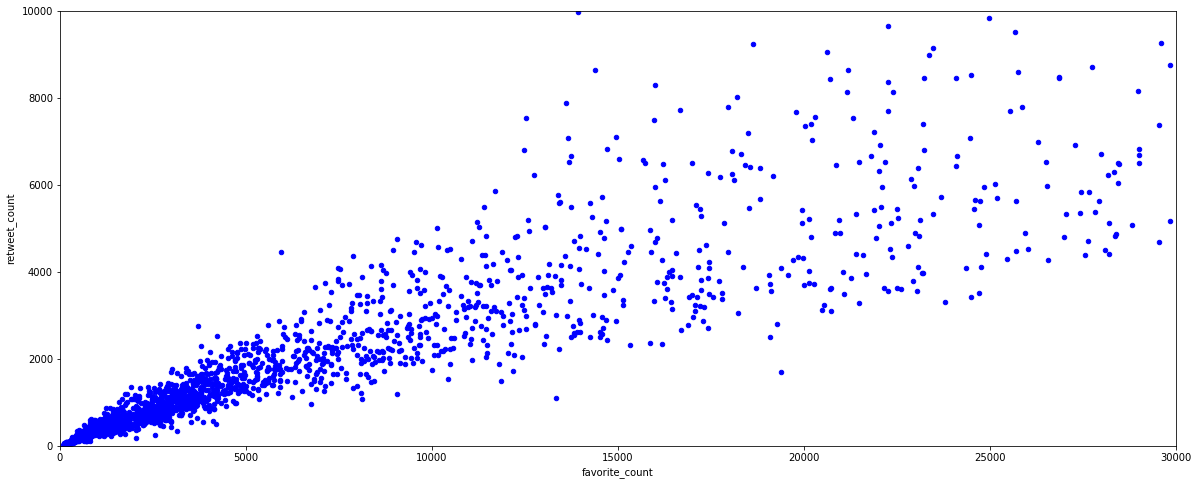

In [53]:
import matplotlib.pyplot as plt
df_dogs.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='blue', figsize=(20,8),ylim=(0,10000), xlim=(0,30000))
plt.show()

通过点赞数和转发数的数据绘制的三点图可以看出两者具有一定的线性关系，高点赞数和高转发数的ID会越来越少。

#### 查找最受欢迎的狗狗

In [47]:
# best = votes_df.loc[votes_df['vote'] == votes_df.vote.max()] 
# best.shape[0]
best_rate = df_dogs.loc[df_dogs['rating_numerator'] == df_dogs.rating_numerator.max()]
best_rate

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,p1,retweet_count,favorite_count
726,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,17.76,10,Atticus,,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,2769,5594


In [48]:
most_favor = df_dogs.loc[df_dogs['favorite_count'] == df_dogs.favorite_count.max()]
most_favor

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,p1,retweet_count,favorite_count
309,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,13.0,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,47958,132318


我们发现由于文字说明的不规范，导致提取的评分数据产生异常，评分最高的狗，他的转发数和点赞数并没有特别突出。因此我们通过点赞数最高的数据来查看最受欢迎的狗。

#### 产看最后欢迎狗狗的品种和阶段

In [49]:
df_dogs.p1.value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Cardigan                      17
beagle                        17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
Lakeland_terrier              16
kuvasz                        16
web_site                      15
          

In [50]:
df_dogs.stage.value_counts()

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

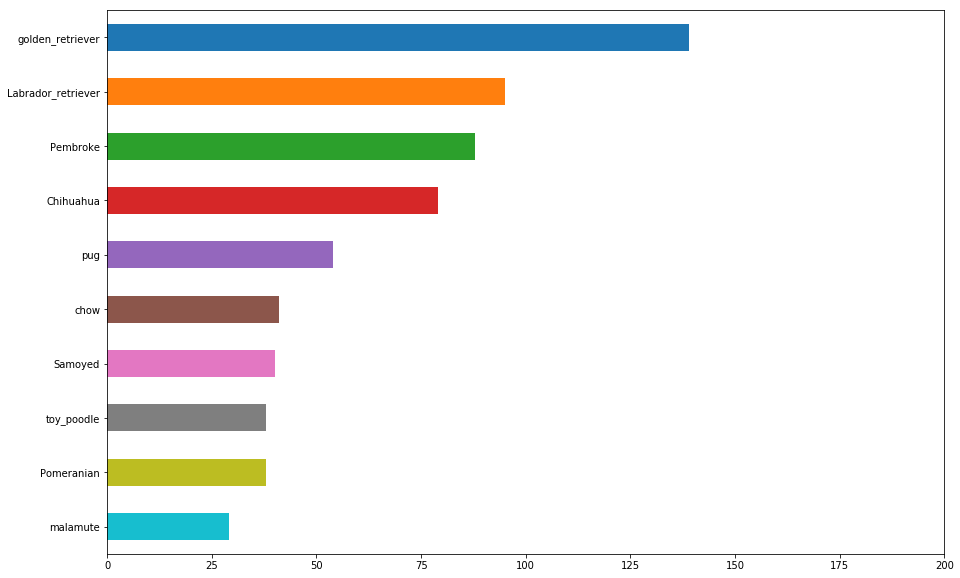

In [51]:
df_dogs.p1.value_counts()[:10].plot(kind='barh', figsize=(15,10), xlim=(0,200)).invert_yaxis()

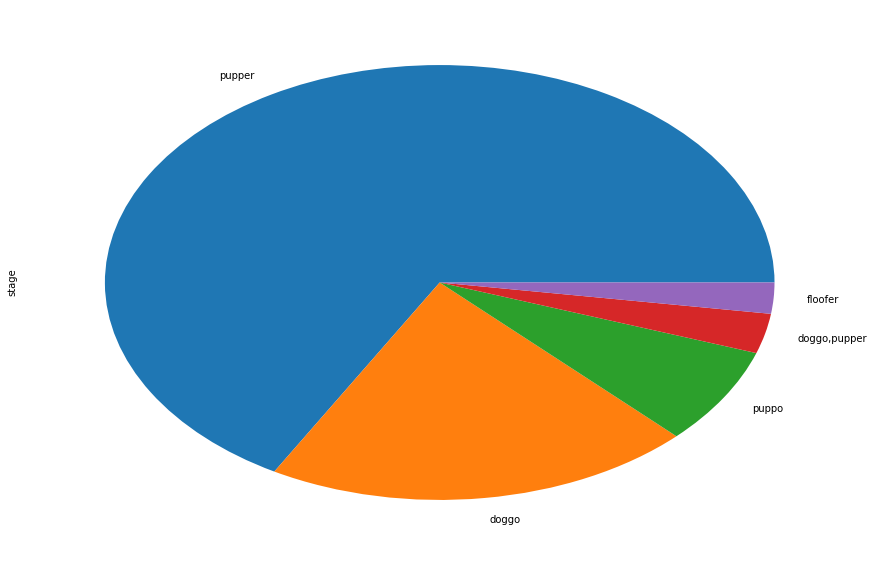

In [52]:
df_dogs.stage.value_counts()[1:6].plot(kind='pie', figsize=(15,10))

通过选择分析和图表展示，金毛犬是最受欢迎的狗的品种；幼犬是提供狗的成长阶段数据中最多的。

更多说明或总结等

## 总结

通过对tweet上的数整理分析后我们可以推测出如下结论：

- 对宠物狗的点赞数和转发数存在正相关的线性关系，这不难理解，人们往往会转发自己喜欢的东西，一般来说，喜欢是转发的前提，所以只有喜欢了，才有可能触发转发的行为，以上数据刚好佐证了这一点。


- 数据的局限性，由于数据存在一定的质量问题，即便修复也没办法得出某些结论，我们尝试找出评分最高的狗，但是我们失败了。由于这不是一次有组织性的选狗大赛，所以企图从分散的数据中得到一致的答案是有困难的。就是因为填写的不规范，我们只能通过点赞数得到狗的ID，而不是评价性的结论。


- 通过对识别图片的整理，我们收集到了最多品种的狗的照片。虽然整个数据集是一个样本数据，但是满足抽样的随机性，由此可以推测，在西方国家，金毛犬的饲养比例也是较高的。另外，狗跟人一样在早期阶段比较可爱，人们更愿意展示。

#### 参考资料

http://c.biancheng.net/view/2225.html

https://www.jb51.net/article/136707.htm

https://ode.visualstudio.com/docs/?dv=win

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?highlight=loc

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html?highlight=extract#pandas.Series.str.extract

https://www.runoob.com/python/python-reg-expressions.html

https://blog.csdn.net/qq_32607273/article/details/81809986

https://blog.csdn.net/Mr_HHH/article/details/79488517

https://blog.csdn.net/tcy23456/article/details/85681865

https://blog.csdn.net/qq_21840201/article/details/80727504

https://www.cnblogs.com/woaixuexi9999/p/9238098.html

https://www.jianshu.com/p/e37bcd502afa